# Pandas Tutorial

This is a short introduction to the Pandas library based on the ["10 Minutes to Pandas"](http://pandas.pydata.org/pandas-docs/stable/10min.html) guideline, with adaptations by Ortal Dayan. For more complex recipes refer to the [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook) 

## Table of Contents

- [Pandas](#Pandas)
- [Object Types and How to Create them](#Object-Types-and-How-to-Create-them)
    - [Series ](#Series )
    - [DataFrame](#DataFrame)
- [Viewing Data](#Viewing-Data)
- [Selection](#Selection)
    - [Getting](#Getting:-selection-using-rectangular-brackets-[-])
    - [Selection by Label](#Selection-by-Label:-using-df.loc[])
    - [Selection by Position](#Selection-by-Position:-using-df.iloc[])
    - [Boolean Indexing](#Boolean-Indexing)
    - [Setting](#Setting)
- [Missing Data](#Missing-Data)
- [Operations](#Operations)
    - [Stats](#Stats)
    - [Apply](#Apply)
    - [Histogramming](#Histogramming)
    - [String Methods](#String-Methods)
- [Merge](#Merge)
    - [Concat](#Concat)
    - [Join](#Join)
    - [Append](#Append)
- [Grouping](#Grouping)
- [Reshaping](#Reshaping)
    - [Stack](#Stack)
    - [Pivot Tables](#Pivot-Tables)
- [Time Series](#Time-Series)
- [Categoricals](#Categoricals)
- [Plotting](#Plotting)
- [Getting Data In/Out](#Getting-Data-In/Out-(file-formats))
    - [Excel](#Excel)
    - [CSV](#CSV)
    - [HDF5](#HDF5)
- [Gotchas](#Gotchas)

## Pandas

Is a 3rd party Python library for data manipulation and analysis. 
<br> In particular, it offers data structures and operations for manipulating numerical tables and time series.

Customarily, we import as follows:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Force printing all the variables in each cell, not just the last one: 

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Object Types in Pandas and How to Create them

For the documentation refer to [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro) in the Pandas user guide

### Series 

Is a one-dimensional labeled array. The axis labels are collectively referred to as the index. 

It is capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.).
We can create a series by passing any of the following to the data argument in pd.series(): 

1. A scalar 
2. An iterable object (any Python object capable of returning its members one at a time, permitting it to be iterated over in a for-loop). E.g. lists, tuples, sets, dictionaries, strings and 1D numpy arrays


A scalar value:

In [3]:
pd.Series(7, index=[1, 2, 3, 4])

1    7
2    7
3    7
4    7
dtype: int64

An iterable object:

In [4]:
# A list
pd.Series([1,3,'a',np.nan,6,8]) # and letting pandas create a default integer index

0      1
1      3
2      a
3    NaN
4      6
5      8
dtype: object

In [5]:
# A 1D Numpy array
pd.Series(np.array([1,3,2,6,8]))

0    1
1    3
2    2
3    6
4    8
dtype: int64

In [6]:
# A dictionary
pd.Series({'A':'cat' , 'B':'dog', 'C':'fish'})

A     cat
B     dog
C    fish
dtype: object

In [7]:
# A string
pd.Series('hello', index=[1, 2, 3])

1    hello
2    hello
3    hello
dtype: object

### DataFrame 

Is a 2-dimensional labeled data structure with columns of potentially different types. 
<br>You can think of it like a spreadsheet or SQL table, or a dictionary of Series objects. 

pd.DataFrame() accepts for the data argument:

1. 2-D numpy.ndarray
2. Dictionary of objects that can be converted to series-like. Meaning dictionary of scalars or any of the following iterable objects: 1D ndarrays, lists, tuples, dictionaries and Series 


Along with the data argument, you can optionally pass index (row labels) and columns (column labels) arguments. 

If axis labels are not passed, they will be constructed from the input data based on common sense rules.


Creating a DataFrame by passing a 2D numpy array (with a datetime index and labeled columns):

In [8]:
# pd.date_range() - returns a fixed frequency DatetimeIndex, meaning the range of equally spaced time points 
#(where the difference between any two adjacent points is specified by the given frequency)
# start date and periods (number of periods to generate) 
# freq='D' by default is freq upon creation e.g. increase index by 1 day for the number of periods(days)
dates = pd.date_range('20130101', periods=6) # another object type in Pandas 
dates 

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [9]:
# np.random.randn() - returns a sample from the “standard normal” distribution
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD')) 
df

,A,B,C,D
2013-01-01,-0.717169,0.362105,-0.627624,0.000054
2013-01-02,-0.692951,-0.585807,-0.450885,0.015290
2013-01-03,0.139140,-0.037387,1.721143,1.273996
2013-01-04,-0.081587,-0.192390,-0.015716,0.942690
2013-01-05,1.158651,1.419520,-0.131785,0.886968
2013-01-06,0.944435,-0.007257,0.621137,-0.547082


Creating a DataFrame by passing a dict with scalar and differnt iterables:

In [10]:
df2 = pd.DataFrame({'A':1.,
                   'B':pd.Timestamp('20130102'), # Timestamp - It’s the type used for the entries that make up a DatetimeIndex, and other timeseries oriented data structures in pandas.
                   'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                   'D':np.array([3]*4),
                   'E':pd.Categorical(["test","train","test","train"]), # Use Categorical dtype when the range of values is fixed 
                   'F':'foo'}) # An object is a string in pandas
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [11]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int64
E          category
F            object
dtype: object

To read about all [dtypes](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#dtypes) (e.g. sparse and boolean)

If you’re using IPython, tab completion for column names as well as methods that can be applied on the dataframe is automatically enabled. Here’s a subset of the attributes that will be completed:

df2.TAB    
<br>df2.A                  <br>df2.bool
<br>df2.abs                <br>df2.boxplot
<br>df2.add                <br>df2.C
<br>df2.add_prefix         <br>df2.clip
<br>df2.add_suffix         <br>df2.columns
<br>df2.align              <br>df2.copy
<br>df2.all                <br>df2.count
<br>df2.any                <br>df2.combine
<br>df2.append             <br>df2.D
<br>df2.apply              <br>df2.describe
<br>df2.applymap           <br>df2.diff
<br>df2.B                  <br>df2.duplicated

As you can see, df2 columns (A, B, C...) are automatically tab completed. 

In [12]:
#df2.A  # df2.<TAB>

## Viewing Data

See the [Basics section](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics) 

See the top & bottom rows of the frame

In [13]:
df

,A,B,C,D
2013-01-01,-0.717169,0.362105,-0.627624,0.000054
2013-01-02,-0.692951,-0.585807,-0.450885,0.015290
2013-01-03,0.139140,-0.037387,1.721143,1.273996
2013-01-04,-0.081587,-0.192390,-0.015716,0.942690
2013-01-05,1.158651,1.419520,-0.131785,0.886968
2013-01-06,0.944435,-0.007257,0.621137,-0.547082


In [14]:
df.head(5)

,A,B,C,D
2013-01-01,-0.717169,0.362105,-0.627624,0.000054
2013-01-02,-0.692951,-0.585807,-0.450885,0.015290
2013-01-03,0.139140,-0.037387,1.721143,1.273996
2013-01-04,-0.081587,-0.192390,-0.015716,0.942690
2013-01-05,1.158651,1.419520,-0.131785,0.886968


In [15]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.081587,-0.192390,-0.015716,0.942690
2013-01-05,1.158651,1.419520,-0.131785,0.886968
2013-01-06,0.944435,-0.007257,0.621137,-0.547082


Display the index, columns, and the underlying numpy data

In [16]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [17]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [18]:
df.values

array([[-7.17168500e-01,  3.62105436e-01, -6.27623746e-01,
         5.39464330e-05],
       [-6.92951062e-01, -5.85807384e-01, -4.50885213e-01,
         1.52903836e-02],
       [ 1.39139603e-01, -3.73873315e-02,  1.72114271e+00,
         1.27399643e+00],
       [-8.15866435e-02, -1.92390378e-01, -1.57161737e-02,
         9.42689856e-01],
       [ 1.15865073e+00,  1.41952047e+00, -1.31784739e-01,
         8.86968455e-01],
       [ 9.44435443e-01, -7.25661257e-03,  6.21136788e-01,
        -5.47081555e-01]])

Describe shows a quick statistic summary of your data

In [19]:
df.describe() # count: Count non-NA cells for each column or row

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.125087,0.159797,0.186045,0.428653
std,0.795120,0.689142,0.866636,0.706472
min,-0.717169,-0.585807,-0.627624,-0.547082
25%,-0.540110,-0.153640,-0.371110,0.003863
50%,0.028776,-0.022322,-0.073750,0.451129
75%,0.743111,0.269765,0.461924,0.928760
max,1.158651,1.419520,1.721143,1.273996


Transposing your data

In [20]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.717169,-0.692951,0.139140,-0.081587,1.158651,0.944435
B,0.362105,-0.585807,-0.037387,-0.192390,1.419520,-0.007257
C,-0.627624,-0.450885,1.721143,-0.015716,-0.131785,0.621137
D,0.000054,0.015290,1.273996,0.942690,0.886968,-0.547082


Sorting by an axis

In [21]:
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2013-01-06,0.944435,-0.007257,0.621137,-0.547082
2013-01-05,1.158651,1.419520,-0.131785,0.886968
2013-01-04,-0.081587,-0.192390,-0.015716,0.942690
2013-01-03,0.139140,-0.037387,1.721143,1.273996
2013-01-02,-0.692951,-0.585807,-0.450885,0.015290
2013-01-01,-0.717169,0.362105,-0.627624,0.000054


Note: 
    
The axis argument is for the Axis along which the function is applied:

- 0 or ‘index’: apply function to each column

- 1 or ‘columns’: apply function to each row

In [22]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.000054,-0.627624,0.362105,-0.717169
2013-01-02,0.015290,-0.450885,-0.585807,-0.692951
2013-01-03,1.273996,1.721143,-0.037387,0.139140
2013-01-04,0.942690,-0.015716,-0.192390,-0.081587
2013-01-05,0.886968,-0.131785,1.419520,1.158651
2013-01-06,-0.547082,0.621137,-0.007257,0.944435


Sorting by value

In [23]:
df.sort_values(by='B')

,A,B,C,D
2013-01-02,-0.692951,-0.585807,-0.450885,0.015290
2013-01-04,-0.081587,-0.192390,-0.015716,0.942690
2013-01-03,0.139140,-0.037387,1.721143,1.273996
2013-01-06,0.944435,-0.007257,0.621137,-0.547082
2013-01-01,-0.717169,0.362105,-0.627624,0.000054
2013-01-05,1.158651,1.419520,-0.131785,0.886968


## Selection

**Note:** While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.

See the indexing documentation [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

### Getting: selection using rectangular brackets [ ]

Selecting columns by providing a single or list of column labels:

In [24]:
df
df['A'] # selecting a single column yields a Series
df[['A','B']]

,A,B,C,D
2013-01-01,-0.717169,0.362105,-0.627624,0.000054
2013-01-02,-0.692951,-0.585807,-0.450885,0.015290
2013-01-03,0.139140,-0.037387,1.721143,1.273996
2013-01-04,-0.081587,-0.192390,-0.015716,0.942690
2013-01-05,1.158651,1.419520,-0.131785,0.886968
2013-01-06,0.944435,-0.007257,0.621137,-0.547082


2013-01-01   -0.717169
2013-01-02   -0.692951
2013-01-03    0.139140
2013-01-04   -0.081587
2013-01-05    1.158651
2013-01-06    0.944435
Freq: D, Name: A, dtype: float64

,A,B
2013-01-01,-0.717169,0.362105
2013-01-02,-0.692951,-0.585807
2013-01-03,0.139140,-0.037387
2013-01-04,-0.081587,-0.192390
2013-01-05,1.158651,1.419520
2013-01-06,0.944435,-0.007257


Selecting rows (slicing inside of [] slices the rows):

In [25]:
df
df[0:3] # note: slicing with positional indexes doesn't include the stop index  

,A,B,C,D
2013-01-01,-0.717169,0.362105,-0.627624,0.000054
2013-01-02,-0.692951,-0.585807,-0.450885,0.015290
2013-01-03,0.139140,-0.037387,1.721143,1.273996
2013-01-04,-0.081587,-0.192390,-0.015716,0.942690
2013-01-05,1.158651,1.419520,-0.131785,0.886968
2013-01-06,0.944435,-0.007257,0.621137,-0.547082


,A,B,C,D
2013-01-01,-0.717169,0.362105,-0.627624,0.000054
2013-01-02,-0.692951,-0.585807,-0.450885,0.015290
2013-01-03,0.139140,-0.037387,1.721143,1.273996


In [26]:
df
df['20130102':'20130104'] # Note: Slicing with labeled indexes includes the stop index



,A,B,C,D
2013-01-01,-0.717169,0.362105,-0.627624,0.000054
2013-01-02,-0.692951,-0.585807,-0.450885,0.015290
2013-01-03,0.139140,-0.037387,1.721143,1.273996
2013-01-04,-0.081587,-0.192390,-0.015716,0.942690
2013-01-05,1.158651,1.419520,-0.131785,0.886968
2013-01-06,0.944435,-0.007257,0.621137,-0.547082


,A,B,C,D
2013-01-02,-0.692951,-0.585807,-0.450885,0.015290
2013-01-03,0.139140,-0.037387,1.721143,1.273996
2013-01-04,-0.081587,-0.192390,-0.015716,0.942690


### Selection by Label: using df.loc[]

See more in [Selection by Label](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#selection-by-label)

The following are valid inputs for both index and column labels:

- A single label, e.g. 5 or 'a' (Note that 5 is interpreted as a label of the index. This use is not an integer position along the index.).

- A list or array of labels ['a', 'b', 'c'] <br>

- A slice object with labels 'a':'f' (Note that with label slicing the stop is included) <br>

- A boolean array <br>

- A callable, see Selection By Callable <br> # df1.loc[lambda df: df['A'] > 0, :

For getting a cross section using a single label, e.g. 5 or 'a' (Note that 5 is interpreted as a label of the index. This use is not an integer position along the index.).


In [27]:
df
dates

,A,B,C,D
2013-01-01,-0.717169,0.362105,-0.627624,0.000054
2013-01-02,-0.692951,-0.585807,-0.450885,0.015290
2013-01-03,0.139140,-0.037387,1.721143,1.273996
2013-01-04,-0.081587,-0.192390,-0.015716,0.942690
2013-01-05,1.158651,1.419520,-0.131785,0.886968
2013-01-06,0.944435,-0.007257,0.621137,-0.547082


DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [28]:
dates[0]
df.loc[dates[0]]

Timestamp('2013-01-01 00:00:00', freq='D')

A   -0.717169
B    0.362105
C   -0.627624
D    0.000054
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label - by a list or array of labels ['a', 'b', 'c']:

In [29]:
df
df.loc[:,['A','B']]

,A,B,C,D
2013-01-01,-0.717169,0.362105,-0.627624,0.000054
2013-01-02,-0.692951,-0.585807,-0.450885,0.015290
2013-01-03,0.139140,-0.037387,1.721143,1.273996
2013-01-04,-0.081587,-0.192390,-0.015716,0.942690
2013-01-05,1.158651,1.419520,-0.131785,0.886968
2013-01-06,0.944435,-0.007257,0.621137,-0.547082


,A,B
2013-01-01,-0.717169,0.362105
2013-01-02,-0.692951,-0.585807
2013-01-03,0.139140,-0.037387
2013-01-04,-0.081587,-0.192390
2013-01-05,1.158651,1.419520
2013-01-06,0.944435,-0.007257


In [30]:
df.loc[:, ['A','B']]

,A,B
2013-01-01,-0.717169,0.362105
2013-01-02,-0.692951,-0.585807
2013-01-03,0.139140,-0.037387
2013-01-04,-0.081587,-0.192390
2013-01-05,1.158651,1.419520
2013-01-06,0.944435,-0.007257


Showing label slicing, both endpoints are included - using a slice object with labels 'a':'f' (Note that with label slicing the stop is included): 

In [31]:
df
df.loc['20130102':'20130104',['A','B']]

,A,B,C,D
2013-01-01,-0.717169,0.362105,-0.627624,0.000054
2013-01-02,-0.692951,-0.585807,-0.450885,0.015290
2013-01-03,0.139140,-0.037387,1.721143,1.273996
2013-01-04,-0.081587,-0.192390,-0.015716,0.942690
2013-01-05,1.158651,1.419520,-0.131785,0.886968
2013-01-06,0.944435,-0.007257,0.621137,-0.547082


,A,B
2013-01-02,-0.692951,-0.585807
2013-01-03,0.139140,-0.037387
2013-01-04,-0.081587,-0.192390


Reduction in the dimensions of the returned object (getting a series from DataFrame)

In [32]:
df
df.loc['20130102',['A','B']]

,A,B,C,D
2013-01-01,-0.717169,0.362105,-0.627624,0.000054
2013-01-02,-0.692951,-0.585807,-0.450885,0.015290
2013-01-03,0.139140,-0.037387,1.721143,1.273996
2013-01-04,-0.081587,-0.192390,-0.015716,0.942690
2013-01-05,1.158651,1.419520,-0.131785,0.886968
2013-01-06,0.944435,-0.007257,0.621137,-0.547082


A   -0.692951
B   -0.585807
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value

In [33]:
df
df.loc[dates[0],'A']

,A,B,C,D
2013-01-01,-0.717169,0.362105,-0.627624,0.000054
2013-01-02,-0.692951,-0.585807,-0.450885,0.015290
2013-01-03,0.139140,-0.037387,1.721143,1.273996
2013-01-04,-0.081587,-0.192390,-0.015716,0.942690
2013-01-05,1.158651,1.419520,-0.131785,0.886968
2013-01-06,0.944435,-0.007257,0.621137,-0.547082


-0.7171685000158525

Using a boolean array:

In [34]:
df.loc['20130102':'20130104',[True, False, True, False]]

,A,C
2013-01-02,-0.692951,-0.450885
2013-01-03,0.139140,1.721143
2013-01-04,-0.081587,-0.015716


Using: 

In [35]:
df.loc[df['A'] > 0, :]

,A,B,C,D
2013-01-03,0.139140,-0.037387,1.721143,1.273996
2013-01-05,1.158651,1.419520,-0.131785,0.886968
2013-01-06,0.944435,-0.007257,0.621137,-0.547082


### Selection by Position: using df.iloc[]

See more in [Selection by Position](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#selection-by-position)

Selects rows and column via the position of the passed integers 

Select a row:

In [36]:
df
df.iloc[3]

,A,B,C,D
2013-01-01,-0.717169,0.362105,-0.627624,0.000054
2013-01-02,-0.692951,-0.585807,-0.450885,0.015290
2013-01-03,0.139140,-0.037387,1.721143,1.273996
2013-01-04,-0.081587,-0.192390,-0.015716,0.942690
2013-01-05,1.158651,1.419520,-0.131785,0.886968
2013-01-06,0.944435,-0.007257,0.621137,-0.547082


A   -0.081587
B   -0.192390
C   -0.015716
D    0.942690
Name: 2013-01-04 00:00:00, dtype: float64

In [37]:
df.iloc[:, 3]

2013-01-01    0.000054
2013-01-02    0.015290
2013-01-03    1.273996
2013-01-04    0.942690
2013-01-05    0.886968
2013-01-06   -0.547082
Freq: D, Name: D, dtype: float64

Slicing by integer (positional), doesn't include the stop point (similar to numpy array slicing): 

In [38]:
df
df.iloc[3:5,0:2]

,A,B,C,D
2013-01-01,-0.717169,0.362105,-0.627624,0.000054
2013-01-02,-0.692951,-0.585807,-0.450885,0.015290
2013-01-03,0.139140,-0.037387,1.721143,1.273996
2013-01-04,-0.081587,-0.192390,-0.015716,0.942690
2013-01-05,1.158651,1.419520,-0.131785,0.886968
2013-01-06,0.944435,-0.007257,0.621137,-0.547082


,A,B
2013-01-04,-0.081587,-0.19239
2013-01-05,1.158651,1.41952


Slicing by lists of integer position locations, similar to the numpy style:

In [39]:
df
df.iloc[[1,2,4],[0,2]]

,A,B,C,D
2013-01-01,-0.717169,0.362105,-0.627624,0.000054
2013-01-02,-0.692951,-0.585807,-0.450885,0.015290
2013-01-03,0.139140,-0.037387,1.721143,1.273996
2013-01-04,-0.081587,-0.192390,-0.015716,0.942690
2013-01-05,1.158651,1.419520,-0.131785,0.886968
2013-01-06,0.944435,-0.007257,0.621137,-0.547082


,A,C
2013-01-02,-0.692951,-0.450885
2013-01-03,0.139140,1.721143
2013-01-05,1.158651,-0.131785


For slicing rows explicitly:

In [40]:
df
df.iloc[1:3,:]

,A,B,C,D
2013-01-01,-0.717169,0.362105,-0.627624,0.000054
2013-01-02,-0.692951,-0.585807,-0.450885,0.015290
2013-01-03,0.139140,-0.037387,1.721143,1.273996
2013-01-04,-0.081587,-0.192390,-0.015716,0.942690
2013-01-05,1.158651,1.419520,-0.131785,0.886968
2013-01-06,0.944435,-0.007257,0.621137,-0.547082


,A,B,C,D
2013-01-02,-0.692951,-0.585807,-0.450885,0.015290
2013-01-03,0.139140,-0.037387,1.721143,1.273996


For slicing columns explicitly:

In [41]:
df
df.iloc[:,1:3]

,A,B,C,D
2013-01-01,-0.717169,0.362105,-0.627624,0.000054
2013-01-02,-0.692951,-0.585807,-0.450885,0.015290
2013-01-03,0.139140,-0.037387,1.721143,1.273996
2013-01-04,-0.081587,-0.192390,-0.015716,0.942690
2013-01-05,1.158651,1.419520,-0.131785,0.886968
2013-01-06,0.944435,-0.007257,0.621137,-0.547082


,B,C
2013-01-01,0.362105,-0.627624
2013-01-02,-0.585807,-0.450885
2013-01-03,-0.037387,1.721143
2013-01-04,-0.192390,-0.015716
2013-01-05,1.419520,-0.131785
2013-01-06,-0.007257,0.621137


For getting a value explicitly:

In [42]:
%timeit df.iloc[1,1] # single % for a line magic - measures line execution time 
print(df.iloc[1,1])

124 µs ± 66.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
-0.5858073840858082


For getting fast access to a scalar (equiv to the prior method)

In [43]:
%timeit df.iat[1,1]

71.8 µs ± 12 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Boolean Indexing

Using getting ([ ]). 
Mostly used for filtering using the concept of masking: creating a "masked DataFrame" in which the elements not fulfilling the condition will be either labeled "invalid", meaning NaNs (missing values) or removed)

Using a single row/column’s values to select rows:

In [44]:
df
df.A > 0 # returns a series with True False values and df indexes

df[df.A > 0]


,A,B,C,D
2013-01-01,-0.717169,0.362105,-0.627624,0.000054
2013-01-02,-0.692951,-0.585807,-0.450885,0.015290
2013-01-03,0.139140,-0.037387,1.721143,1.273996
2013-01-04,-0.081587,-0.192390,-0.015716,0.942690
2013-01-05,1.158651,1.419520,-0.131785,0.886968
2013-01-06,0.944435,-0.007257,0.621137,-0.547082


2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06     True
Freq: D, Name: A, dtype: bool

,A,B,C,D
2013-01-03,0.139140,-0.037387,1.721143,1.273996
2013-01-05,1.158651,1.419520,-0.131785,0.886968
2013-01-06,0.944435,-0.007257,0.621137,-0.547082


In [45]:
df.index > '2013-01-02'

df[df.index > '2013-01-02']

array([False, False,  True,  True,  True,  True])

,A,B,C,D
2013-01-03,0.139140,-0.037387,1.721143,1.273996
2013-01-04,-0.081587,-0.192390,-0.015716,0.942690
2013-01-05,1.158651,1.419520,-0.131785,0.886968
2013-01-06,0.944435,-0.007257,0.621137,-0.547082


Selecting (changing to NANs) values from a DataFrame where a boolean condition is met:

In [46]:
df
df > 0

,A,B,C,D
2013-01-01,-0.717169,0.362105,-0.627624,0.000054
2013-01-02,-0.692951,-0.585807,-0.450885,0.015290
2013-01-03,0.139140,-0.037387,1.721143,1.273996
2013-01-04,-0.081587,-0.192390,-0.015716,0.942690
2013-01-05,1.158651,1.419520,-0.131785,0.886968
2013-01-06,0.944435,-0.007257,0.621137,-0.547082


,A,B,C,D
2013-01-01,False,True,False,True
2013-01-02,False,False,False,True
2013-01-03,True,False,True,True
2013-01-04,False,False,False,True
2013-01-05,True,True,False,True
2013-01-06,True,False,True,False


In [47]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.362105,NaN,0.000054
2013-01-02,NaN,NaN,NaN,0.015290
2013-01-03,0.139140,NaN,1.721143,1.273996
2013-01-04,NaN,NaN,NaN,0.942690
2013-01-05,1.158651,1.419520,NaN,0.886968
2013-01-06,0.944435,NaN,0.621137,NaN


Using the isin() method for filtering rows:<br>
pd.isin() - Returns DataFrame of booleans showing whether each element in the DataFrame is contained in the list of values. 

First, we'll create a copy of the dataframe. 
In Pandas, slicing a DataFrame (like numpy arrays) returns a reference to the initial DataFrame. 
Thus, changing the subset will change the initial DataFrame.
Therefore, you'd want to use the copy method if you want to make sure the initial DataFrame shouldn't change. 

In [48]:
df
# showing how making changes to the slice without using pd.copy() will result in changes in the initial dataframe 
df2 = df[0:2]
df2
df2.iat[0,0] = 0
df

,A,B,C,D
2013-01-01,-0.717169,0.362105,-0.627624,0.000054
2013-01-02,-0.692951,-0.585807,-0.450885,0.015290
2013-01-03,0.139140,-0.037387,1.721143,1.273996
2013-01-04,-0.081587,-0.192390,-0.015716,0.942690
2013-01-05,1.158651,1.419520,-0.131785,0.886968
2013-01-06,0.944435,-0.007257,0.621137,-0.547082


,A,B,C,D
2013-01-01,-0.717169,0.362105,-0.627624,0.000054
2013-01-02,-0.692951,-0.585807,-0.450885,0.015290


,A,B,C,D
2013-01-01,0.000000,0.362105,-0.627624,0.000054
2013-01-02,-0.692951,-0.585807,-0.450885,0.015290
2013-01-03,0.139140,-0.037387,1.721143,1.273996
2013-01-04,-0.081587,-0.192390,-0.015716,0.942690
2013-01-05,1.158651,1.419520,-0.131785,0.886968
2013-01-06,0.944435,-0.007257,0.621137,-0.547082


In [49]:
df2 = df.copy() 
df
df2
df2.iat[0,1] = 0
df2
df

,A,B,C,D
2013-01-01,0.000000,0.362105,-0.627624,0.000054
2013-01-02,-0.692951,-0.585807,-0.450885,0.015290
2013-01-03,0.139140,-0.037387,1.721143,1.273996
2013-01-04,-0.081587,-0.192390,-0.015716,0.942690
2013-01-05,1.158651,1.419520,-0.131785,0.886968
2013-01-06,0.944435,-0.007257,0.621137,-0.547082


,A,B,C,D
2013-01-01,0.000000,0.362105,-0.627624,0.000054
2013-01-02,-0.692951,-0.585807,-0.450885,0.015290
2013-01-03,0.139140,-0.037387,1.721143,1.273996
2013-01-04,-0.081587,-0.192390,-0.015716,0.942690
2013-01-05,1.158651,1.419520,-0.131785,0.886968
2013-01-06,0.944435,-0.007257,0.621137,-0.547082


,A,B,C,D
2013-01-01,0.000000,0.000000,-0.627624,0.000054
2013-01-02,-0.692951,-0.585807,-0.450885,0.015290
2013-01-03,0.139140,-0.037387,1.721143,1.273996
2013-01-04,-0.081587,-0.192390,-0.015716,0.942690
2013-01-05,1.158651,1.419520,-0.131785,0.886968
2013-01-06,0.944435,-0.007257,0.621137,-0.547082


,A,B,C,D
2013-01-01,0.000000,0.362105,-0.627624,0.000054
2013-01-02,-0.692951,-0.585807,-0.450885,0.015290
2013-01-03,0.139140,-0.037387,1.721143,1.273996
2013-01-04,-0.081587,-0.192390,-0.015716,0.942690
2013-01-05,1.158651,1.419520,-0.131785,0.886968
2013-01-06,0.944435,-0.007257,0.621137,-0.547082


In [50]:
df2['E'] = ['one','one', 'two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-0.627624,0.000054,one
2013-01-02,-0.692951,-0.585807,-0.450885,0.015290,one
2013-01-03,0.139140,-0.037387,1.721143,1.273996,two
2013-01-04,-0.081587,-0.192390,-0.015716,0.942690,three
2013-01-05,1.158651,1.419520,-0.131785,0.886968,four
2013-01-06,0.944435,-0.007257,0.621137,-0.547082,three


In [51]:
df2["E"].isin(["two", "four"])

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

In [52]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,0.139140,-0.037387,1.721143,1.273996,two
2013-01-05,1.158651,1.419520,-0.131785,0.886968,four


### Setting

Setting a new column automatically aligns the data by the indexes:

In [53]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102',periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [54]:
df

,A,B,C,D
2013-01-01,0.000000,0.362105,-0.627624,0.000054
2013-01-02,-0.692951,-0.585807,-0.450885,0.015290
2013-01-03,0.139140,-0.037387,1.721143,1.273996
2013-01-04,-0.081587,-0.192390,-0.015716,0.942690
2013-01-05,1.158651,1.419520,-0.131785,0.886968
2013-01-06,0.944435,-0.007257,0.621137,-0.547082


In [55]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,0.000000,0.362105,-0.627624,0.000054,NaN
2013-01-02,-0.692951,-0.585807,-0.450885,0.015290,1.0
2013-01-03,0.139140,-0.037387,1.721143,1.273996,2.0
2013-01-04,-0.081587,-0.192390,-0.015716,0.942690,3.0
2013-01-05,1.158651,1.419520,-0.131785,0.886968,4.0
2013-01-06,0.944435,-0.007257,0.621137,-0.547082,5.0


In [56]:
s2 = pd.Series([1,2,3,4,5,6])
s2
df['F'] = s2
df

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

,A,B,C,D,F
2013-01-01,0.000000,0.362105,-0.627624,0.000054,NaN
2013-01-02,-0.692951,-0.585807,-0.450885,0.015290,NaN
2013-01-03,0.139140,-0.037387,1.721143,1.273996,NaN
2013-01-04,-0.081587,-0.192390,-0.015716,0.942690,NaN
2013-01-05,1.158651,1.419520,-0.131785,0.886968,NaN
2013-01-06,0.944435,-0.007257,0.621137,-0.547082,NaN


Setting values by labels using df.at[] - Access a single value for a row/column label pair: 

In [57]:
df.at[dates[0],'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.362105,-0.627624,0.000054,NaN
2013-01-02,-0.692951,-0.585807,-0.450885,0.015290,NaN
2013-01-03,0.139140,-0.037387,1.721143,1.273996,NaN
2013-01-04,-0.081587,-0.192390,-0.015716,0.942690,NaN
2013-01-05,1.158651,1.419520,-0.131785,0.886968,NaN
2013-01-06,0.944435,-0.007257,0.621137,-0.547082,NaN


Setting values by position:
<br>(df.iat[] - Access a single value for a row/column pair by integer position)

In [58]:
df.iat[0,1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.627624,0.000054,NaN
2013-01-02,-0.692951,-0.585807,-0.450885,0.015290,NaN
2013-01-03,0.139140,-0.037387,1.721143,1.273996,NaN
2013-01-04,-0.081587,-0.192390,-0.015716,0.942690,NaN
2013-01-05,1.158651,1.419520,-0.131785,0.886968,NaN
2013-01-06,0.944435,-0.007257,0.621137,-0.547082,NaN


Setting values by assigning with a numpy array:

In [59]:
df.loc[:,'D'] = np.array([5] * len(df))
df                         

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.627624,5,NaN
2013-01-02,-0.692951,-0.585807,-0.450885,5,NaN
2013-01-03,0.139140,-0.037387,1.721143,5,NaN
2013-01-04,-0.081587,-0.192390,-0.015716,5,NaN
2013-01-05,1.158651,1.419520,-0.131785,5,NaN
2013-01-06,0.944435,-0.007257,0.621137,5,NaN


A masking operation with setting:

In [60]:
df2 = df.copy()
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.627624,5,NaN
2013-01-02,-0.692951,-0.585807,-0.450885,5,NaN
2013-01-03,0.139140,-0.037387,1.721143,5,NaN
2013-01-04,-0.081587,-0.192390,-0.015716,5,NaN
2013-01-05,1.158651,1.419520,-0.131785,5,NaN
2013-01-06,0.944435,-0.007257,0.621137,5,NaN


In [61]:
df2
df2 > 0
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.627624,5,NaN
2013-01-02,-0.692951,-0.585807,-0.450885,5,NaN
2013-01-03,0.139140,-0.037387,1.721143,5,NaN
2013-01-04,-0.081587,-0.192390,-0.015716,5,NaN
2013-01-05,1.158651,1.419520,-0.131785,5,NaN
2013-01-06,0.944435,-0.007257,0.621137,5,NaN


,A,B,C,D,F
2013-01-01,False,False,False,True,False
2013-01-02,False,False,False,True,False
2013-01-03,True,False,True,True,False
2013-01-04,False,False,False,True,False
2013-01-05,True,True,False,True,False
2013-01-06,True,False,True,True,False


,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.627624,-5,NaN
2013-01-02,-0.692951,-0.585807,-0.450885,-5,NaN
2013-01-03,-0.139140,-0.037387,-1.721143,-5,NaN
2013-01-04,-0.081587,-0.192390,-0.015716,-5,NaN
2013-01-05,-1.158651,-1.419520,-0.131785,-5,NaN
2013-01-06,-0.944435,-0.007257,-0.621137,-5,NaN


## Missing Data

Pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the [Missing Data section](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data)

Reindexing allows you to change the position of indexes or add/delete the indexes on a specified axis (both rows and columns). 
<br>This returns a copy of the DataFrame:

In [62]:
df
type(dates)
# removing the 6th row, changing the position of the 5th row and adding 2 new rows as well as adding a column 
# Note the line below is an exampple for method chaining which a is a programmatic style of
# invoking multiple method calls sequentially with each call performing an action on the same object and returning it.
dates_extended = dates[0:4].append(pd.date_range('20130110',periods=2)).append(pd.date_range('20130105',periods=1))
dates_extended
df1 = df.reindex(index=dates_extended, columns=['A','B','D','E'])
df1

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.627624,5,NaN
2013-01-02,-0.692951,-0.585807,-0.450885,5,NaN
2013-01-03,0.139140,-0.037387,1.721143,5,NaN
2013-01-04,-0.081587,-0.192390,-0.015716,5,NaN
2013-01-05,1.158651,1.419520,-0.131785,5,NaN
2013-01-06,0.944435,-0.007257,0.621137,5,NaN


pandas.core.indexes.datetimes.DatetimeIndex

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-10', '2013-01-11', '2013-01-05'],
              dtype='datetime64[ns]', freq=None)

,A,B,D,E
2013-01-01,0.000000,0.000000,5.0,NaN
2013-01-02,-0.692951,-0.585807,5.0,NaN
2013-01-03,0.139140,-0.037387,5.0,NaN
2013-01-04,-0.081587,-0.192390,5.0,NaN
2013-01-10,NaN,NaN,NaN,NaN
2013-01-11,NaN,NaN,NaN,NaN
2013-01-05,1.158651,1.419520,5.0,NaN


In [63]:
df2 = df.reindex(index=dates_extended, columns=['A','B', 'D','E'], fill_value=0)
df2

,A,B,D,E
2013-01-01,0.000000,0.000000,5,0
2013-01-02,-0.692951,-0.585807,5,0
2013-01-03,0.139140,-0.037387,5,0
2013-01-04,-0.081587,-0.192390,5,0
2013-01-10,0.000000,0.000000,0,0
2013-01-11,0.000000,0.000000,0,0
2013-01-05,1.158651,1.419520,5,0


To drop any rows that have missing data:

In [64]:
df1
df1.loc[dates[0] : dates[1], "E"] = 1
df1
df1.dropna(how='all') # Axis defult is zero, meaning drop rows which contain missing values. 
                      # How - any is the default  
                      # Can chose inplace argument=True see next cell 

,A,B,D,E
2013-01-01,0.000000,0.000000,5.0,NaN
2013-01-02,-0.692951,-0.585807,5.0,NaN
2013-01-03,0.139140,-0.037387,5.0,NaN
2013-01-04,-0.081587,-0.192390,5.0,NaN
2013-01-10,NaN,NaN,NaN,NaN
2013-01-11,NaN,NaN,NaN,NaN
2013-01-05,1.158651,1.419520,5.0,NaN


,A,B,D,E
2013-01-01,0.000000,0.000000,5.0,1.0
2013-01-02,-0.692951,-0.585807,5.0,1.0
2013-01-03,0.139140,-0.037387,5.0,NaN
2013-01-04,-0.081587,-0.192390,5.0,NaN
2013-01-10,NaN,NaN,NaN,NaN
2013-01-11,NaN,NaN,NaN,NaN
2013-01-05,1.158651,1.419520,5.0,NaN


,A,B,D,E
2013-01-01,0.000000,0.000000,5.0,1.0
2013-01-02,-0.692951,-0.585807,5.0,1.0
2013-01-03,0.139140,-0.037387,5.0,NaN
2013-01-04,-0.081587,-0.192390,5.0,NaN
2013-01-05,1.158651,1.419520,5.0,NaN


In [65]:
df2 = df1.copy()
df2.dropna(how='any', inplace=True) # Doesn't print output because inplace=True 
# is same as df1 = df1.dropna(how='any', inplace=True)
df2

,A,B,D,E
2013-01-01,0.000000,0.000000,5.0,1.0
2013-01-02,-0.692951,-0.585807,5.0,1.0


Filling missing data:

In [66]:
df1
df1.fillna(value=5)

,A,B,D,E
2013-01-01,0.000000,0.000000,5.0,1.0
2013-01-02,-0.692951,-0.585807,5.0,1.0
2013-01-03,0.139140,-0.037387,5.0,NaN
2013-01-04,-0.081587,-0.192390,5.0,NaN
2013-01-10,NaN,NaN,NaN,NaN
2013-01-11,NaN,NaN,NaN,NaN
2013-01-05,1.158651,1.419520,5.0,NaN


,A,B,D,E
2013-01-01,0.000000,0.000000,5.0,1.0
2013-01-02,-0.692951,-0.585807,5.0,1.0
2013-01-03,0.139140,-0.037387,5.0,5.0
2013-01-04,-0.081587,-0.192390,5.0,5.0
2013-01-10,5.000000,5.000000,5.0,5.0
2013-01-11,5.000000,5.000000,5.0,5.0
2013-01-05,1.158651,1.419520,5.0,5.0


To get the boolean mask where values are nan:

In [67]:
pd.isnull(df1)

,A,B,D,E
2013-01-01,False,False,False,False
2013-01-02,False,False,False,False
2013-01-03,False,False,False,True
2013-01-04,False,False,False,True
2013-01-10,True,True,True,True
2013-01-11,True,True,True,True
2013-01-05,False,False,False,True


## Operations

See the [Basic section on Binary Ops](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

### Statistics

Operations in general exclude missing data.

Performing descriptive statistics

In [68]:
df.mean()

A    0.244615
B    0.099446
C    0.186045
D    5.000000
F         NaN
dtype: float64

Same operation on the other axis

In [69]:
df.mean(1)

2013-01-01    1.093094
2013-01-02    0.817589
2013-01-03    1.705724
2013-01-04    1.177577
2013-01-05    1.861597
2013-01-06    1.639579
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. 
<br> In addition, Pandas automatically broadcasts along the specified dimension: 
 
To read more about broadcasting: [Broadcasting with Pandas](https://stackoverflow.com/questions/29954263/what-does-the-term-broadcasting-mean-in-pandas-documentation)

In [70]:
dates
s = pd.Series([1,3,5,np.nan,6,8], index=dates)
s

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

2013-01-01    1.0
2013-01-02    3.0
2013-01-03    5.0
2013-01-04    NaN
2013-01-05    6.0
2013-01-06    8.0
Freq: D, dtype: float64

In [71]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [72]:
df
# Get Subtraction of dataframe and other, element-wise (binary operator sub)
df.sub(s, axis='index') # axis: Whether to compare by the index (0 or ‘index’) or columns (1 or ‘columns’). 
                        # For Series input, axis to match Series index on. 

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.627624,5,NaN
2013-01-02,-0.692951,-0.585807,-0.450885,5,NaN
2013-01-03,0.139140,-0.037387,1.721143,5,NaN
2013-01-04,-0.081587,-0.192390,-0.015716,5,NaN
2013-01-05,1.158651,1.419520,-0.131785,5,NaN
2013-01-06,0.944435,-0.007257,0.621137,5,NaN


,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.860860,-1.037387,0.721143,4.0,NaN
2013-01-04,-3.081587,-3.192390,-3.015716,2.0,NaN
2013-01-05,-3.841349,-3.580480,-5.131785,0.0,NaN
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

Apply a function along an axis of the DataFrame: 

In [73]:
df
df.apply(np.cumsum) 

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.627624,5,NaN
2013-01-02,-0.692951,-0.585807,-0.450885,5,NaN
2013-01-03,0.139140,-0.037387,1.721143,5,NaN
2013-01-04,-0.081587,-0.192390,-0.015716,5,NaN
2013-01-05,1.158651,1.419520,-0.131785,5,NaN
2013-01-06,0.944435,-0.007257,0.621137,5,NaN


,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.627624,5,NaN
2013-01-02,-0.692951,-0.585807,-1.078509,10,NaN
2013-01-03,-0.553811,-0.623195,0.642634,15,NaN
2013-01-04,-0.635398,-0.815585,0.626918,20,NaN
2013-01-05,0.523253,0.603935,0.495133,25,NaN
2013-01-06,1.467688,0.596679,1.116270,30,NaN


In [74]:
df
df.apply(np.cumsum, axis=1)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.627624,5,NaN
2013-01-02,-0.692951,-0.585807,-0.450885,5,NaN
2013-01-03,0.139140,-0.037387,1.721143,5,NaN
2013-01-04,-0.081587,-0.192390,-0.015716,5,NaN
2013-01-05,1.158651,1.419520,-0.131785,5,NaN
2013-01-06,0.944435,-0.007257,0.621137,5,NaN


,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.627624,4.372376,NaN
2013-01-02,-0.692951,-1.278758,-1.729644,3.270356,NaN
2013-01-03,0.139140,0.101752,1.822895,6.822895,NaN
2013-01-04,-0.081587,-0.273977,-0.289693,4.710307,NaN
2013-01-05,1.158651,2.578171,2.446386,7.446386,NaN
2013-01-06,0.944435,0.937179,1.558316,6.558316,NaN


In [75]:
df.apply(lambda x: x.max() - x.min())

A    1.851602
B    2.005328
C    2.348766
D    0.000000
F         NaN
dtype: float64

Simply put, a **lambda function** is just like any normal python function, 
<br> except that it has no name when defining it, and it is **contained in one line of code**.

Syntax is **lambda argument(s): expression**

#Normal python function
<br>def a_name(x):
<br>&emsp; return x+x
<br>    
#Lambda function
<br>lambda x: x+x


[To read more](https://towardsdatascience.com/lambda-functions-with-practical-examples-in-python-45934f3653a8)

### Counting Unique Values

See more at [Histogramming and Discretization](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#value-counts-histogramming-mode)

In [76]:
# returns an integer number selected element from the specified range
s = pd.Series(np.random.randint(0, 7, size=10)) 
s

0    2
1    1
2    3
3    3
4    4
5    6
6    6
7    4
8    5
9    0
dtype: int64

In [77]:
s.value_counts() # returns a series where values are unique values in the series and the indecies are their counts

3    2
4    2
6    2
2    1
1    1
5    1
0    1
dtype: int64

### String Methods

Series is equipped with a set of **string processing methods** in the **str attribute** that make it easy to operate on each element of the array, as in the code snippet below. 
<br>**str** can be used to access the values of the series as strings and apply several methods to it. 


Note that pattern-matching in str generally uses [regular expressions](https://docs.python.org/2/library/re.html) by default.

See more at [Vectorized String Methods](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).



In [78]:
s = pd.Series([1, 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [79]:
s.str.lower()

0     NaN
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

Pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join/merge-type operations.

The main difference between join vs merge would be; join() is used to combine two DataFrames on the index but not on columns whereas merge() is primarily used to specify the columns you wanted to join on, this also supports joining on indexes and combination of index and columns. [Ref](https://sparkbyexamples.com/pandas/pandas-join-vs-merge-explained-differences/#:~:text=The%20main%20difference%20between%20join,combination%20of%20index%20and%20columns.)

See the [Merging section](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging)

### Concat

Concatenating pandas objects together with concat():

In [80]:
# np.random.randn(, ) Return a sample (or samples) from the “standard normal” distribution.
# The standard normal distribution (Gaussian) is a normal distribution with mean μ = 0 and standard deviation σ = 1.
df = pd.DataFrame(np.random.randn(10, 4)) 
df

,0,1,2,3
0,0.246834,0.010478,-2.553400,0.784637
1,-1.475679,-1.441151,0.114597,-0.379574
2,-1.135628,-0.916568,0.135022,-0.388105
3,1.540583,-0.341526,-1.534206,1.912038
4,0.258491,1.686220,1.130010,-0.503322
5,0.192671,0.276125,0.155796,0.987579
6,-0.202160,-1.595822,1.682455,-0.511821
7,-1.319493,-1.304799,-0.402374,0.197800
8,0.063242,-0.076033,0.040851,-2.143014
9,0.762853,-1.316517,0.530546,0.596735


In [81]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  0.246834  0.010478 -2.553400  0.784637
 1 -1.475679 -1.441151  0.114597 -0.379574
 2 -1.135628 -0.916568  0.135022 -0.388105,
           0         1         2         3
 3  1.540583 -0.341526 -1.534206  1.912038
 4  0.258491  1.686220  1.130010 -0.503322
 5  0.192671  0.276125  0.155796  0.987579
 6 -0.202160 -1.595822  1.682455 -0.511821,
           0         1         2         3
 7 -1.319493 -1.304799 -0.402374  0.197800
 8  0.063242 -0.076033  0.040851 -2.143014
 9  0.762853 -1.316517  0.530546  0.596735]

In [82]:
pd.concat(pieces)

,0,1,2,3
0,0.246834,0.010478,-2.553400,0.784637
1,-1.475679,-1.441151,0.114597,-0.379574
2,-1.135628,-0.916568,0.135022,-0.388105
3,1.540583,-0.341526,-1.534206,1.912038
4,0.258491,1.686220,1.130010,-0.503322
5,0.192671,0.276125,0.155796,0.987579
6,-0.202160,-1.595822,1.682455,-0.511821
7,-1.319493,-1.304799,-0.402374,0.197800
8,0.063242,-0.076033,0.040851,-2.143014
9,0.762853,-1.316517,0.530546,0.596735


In [83]:
pd.concat(pieces, axis=1)

,0,1,2,3,0,1,2,3,0,1,2,3
0,0.246834,0.010478,-2.553400,0.784637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.475679,-1.441151,0.114597,-0.379574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1.135628,-0.916568,0.135022,-0.388105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,1.540583,-0.341526,-1.534206,1.912038,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,0.258491,1.686220,1.130010,-0.503322,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,0.192671,0.276125,0.155796,0.987579,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,-0.202160,-1.595822,1.682455,-0.511821,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.319493,-1.304799,-0.402374,0.197800
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.063242,-0.076033,0.040851,-2.143014
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.762853,-1.316517,0.530546,0.596735


### SQL style merges

See the documentation [Database style joining](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#database-style-dataframe-or-named-series-joining-merging)

Note: Both pd.join and pd.merge can be used to combine two dataframes.  
Since the merge method is more versatile we will cover it in our tutorial. You are encouraged to explore pd.join youselves. 

### Merge
<br>
Experiment with all merge arguments: 
DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)

<br>
<br>
We join by key values. The arguments for keys to join on: on, left_on, right_on, left_index, right_index

<br>
<br>
<br>The how argument tells us the type of merge to be performed (default 'inner'): 

- left: use only keys from left frame, preserve key order

- right: use only keys from right frame, preserve key order

- outer: use union of keys from both frames, sort keys lexicographically

- inner: use intersection of keys from both frames, preserve the order of the left keys


In [84]:
left = pd.DataFrame({'key': ['foo', 'bar', 'baz'], 'lval': [1, 2, 3]})
right = pd.DataFrame({'key': ['foo','bar',  'bar'], 'rval': [3, 5, 6]})


left
right


,key,lval
0,foo,1
1,bar,2
2,baz,3


,key,rval
0,foo,3
1,bar,5
2,bar,6


In [85]:
# To merge on a column/index level name which exists in both dataframes
pd.merge(left, right, on='key') # how is by defalt inner: only keys that exist in both dataframes

,key,lval,rval
0,foo,1,3
1,bar,2,5
2,bar,2,6


In [86]:
left.merge(right, on='key')

,key,lval,rval
0,foo,1,3
1,bar,2,5
2,bar,2,6


In [87]:
# Sort the join keys lexicographically in the merged DataFrame
pd.merge(left, right, on='key', sort=True) 

,key,lval,rval
0,bar,2,5
1,bar,2,6
2,foo,1,3


In [88]:
# To merge on indexes
pd.merge(left, right, left_index=True, right_index=True)

,key_x,lval,key_y,rval
0,foo,1,foo,3
1,bar,2,bar,5
2,baz,3,bar,6


In [89]:
pd.merge(left, right, left_index=True, right_index=True, suffixes=("_l", "_r")) 

,key_l,lval,key_r,rval
0,foo,1,foo,3
1,bar,2,bar,5
2,baz,3,bar,6


In [90]:
left
right
# To merge on different column names
pd.merge(left, right, left_on='lval', right_on='rval')

,key,lval
0,foo,1
1,bar,2
2,baz,3


,key,rval
0,foo,3
1,bar,5
2,bar,6


,key_x,lval,key_y,rval
0,baz,3,foo,3


In [91]:
left
right
pd.merge(left, right, on='key', how='outer') # outer: use union of keys, all keys 

,key,lval
0,foo,1
1,bar,2
2,baz,3


,key,rval
0,foo,3
1,bar,5
2,bar,6


,key,lval,rval
0,foo,1,3.0
1,bar,2,5.0
2,bar,2,6.0
3,baz,3,NaN


In [92]:
left
right
pd.merge(left, right, on='key', how='right') # use only keys from right frame, preserve key order 

,key,lval
0,foo,1
1,bar,2
2,baz,3


,key,rval
0,foo,3
1,bar,5
2,bar,6


,key,lval,rval
0,foo,1,3
1,bar,2,5
2,bar,2,6


### Append

Append rows to a dataframe. See the [Appending](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#appending-rows-to-a-dataframe)

In [93]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D']) # Returns a sample from the “standard normal” distribution
df

,A,B,C,D
0,1.298147,1.349326,0.746069,0.935486
1,-0.298718,-0.222020,0.858833,-0.819062
2,-1.720783,0.476222,-0.863842,0.450461
3,-1.228297,2.202333,-0.184587,-0.291454
4,-0.537563,0.138237,0.010037,-0.538918
5,0.086482,-1.626227,0.306546,-0.370574
6,-0.908784,0.218054,-0.150483,-0.558083
7,2.113681,1.568067,-0.066988,0.029036


In [94]:
s = df.iloc[3]
s

A   -1.228297
B    2.202333
C   -0.184587
D   -0.291454
Name: 3, dtype: float64

In [95]:
df
# Append rows of other to the end of caller, returning a new object.
df.append(s, ignore_index=True)
df.append(s)

,A,B,C,D
0,1.298147,1.349326,0.746069,0.935486
1,-0.298718,-0.222020,0.858833,-0.819062
2,-1.720783,0.476222,-0.863842,0.450461
3,-1.228297,2.202333,-0.184587,-0.291454
4,-0.537563,0.138237,0.010037,-0.538918
5,0.086482,-1.626227,0.306546,-0.370574
6,-0.908784,0.218054,-0.150483,-0.558083
7,2.113681,1.568067,-0.066988,0.029036


,A,B,C,D
0,1.298147,1.349326,0.746069,0.935486
1,-0.298718,-0.222020,0.858833,-0.819062
2,-1.720783,0.476222,-0.863842,0.450461
3,-1.228297,2.202333,-0.184587,-0.291454
4,-0.537563,0.138237,0.010037,-0.538918
5,0.086482,-1.626227,0.306546,-0.370574
6,-0.908784,0.218054,-0.150483,-0.558083
7,2.113681,1.568067,-0.066988,0.029036
8,-1.228297,2.202333,-0.184587,-0.291454


,A,B,C,D
0,1.298147,1.349326,0.746069,0.935486
1,-0.298718,-0.222020,0.858833,-0.819062
2,-1.720783,0.476222,-0.863842,0.450461
3,-1.228297,2.202333,-0.184587,-0.291454
4,-0.537563,0.138237,0.010037,-0.538918
5,0.086482,-1.626227,0.306546,-0.370574
6,-0.908784,0.218054,-0.150483,-0.558083
7,2.113681,1.568067,-0.066988,0.029036
3,-1.228297,2.202333,-0.184587,-0.291454


## Grouping

A groupby operation involves some combination of: 

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

This can be used to group large amounts of data and compute operations on these groups.

See the [Grouping section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [96]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                                    'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                                    'C' : np.random.randn(8),
                                     'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-1.416029,-0.052615
1,bar,one,0.133156,1.491000
2,foo,two,1.826436,2.215434
3,bar,three,1.537658,0.066711
4,foo,two,0.905805,0.041651
5,bar,two,0.228319,-1.991293
6,foo,one,-1.723915,-0.396916
7,foo,three,0.002013,0.815387


Grouping and then applying a sum function to the resulting groups:

In [97]:
# The columns we groupby become the indecies (hierarchical indexing as in multi-indexing) 
# aggregation function is applied to the rest of the columns per group 
df.groupby('A').sum()
type(df.groupby('A').sum())

,C,D
A,,
bar,1.899133,-0.433582
foo,-0.405691,2.622941


pandas.core.frame.DataFrame

In [98]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.133156  1.491000
    three  1.537658  0.066711
    two    0.228319 -1.991293
foo one   -3.139945 -0.449531
    three  0.002013  0.815387
    two    2.732241  2.257084

## Reshaping

See the sections on [Hierarchical Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) and [Reshaping](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking).

### Stack

pd.stack(): Stack the prescribed level(s) from columns to index.

Python's **zip() function** is defined as zip(*iterables).
This function takes in iterables as arguments and returns an iterator which is a series of 
tuples containing elements from each iterable. 
zip() can accept any type of iterable, such as files, lists, tuples, dictionaries, sets, and so on.

Note: The *** operator** is an unpacking operator that will unpack the values from any iterable object, such as lists, tuples, strings, etc…

[To read more about the zip fuction](https://realpython.com/python-zip-function/#:~:text=Python's%20zip()%20function%20is,%2C%20sets%2C%20and%20so%20on),
[To read more about the * operator](https://towardsdatascience.com/unpacking-operators-in-python-306ae44cd480)

Creating a dataframe with multi index:

In [99]:
# To create a list of tuples from 2 lis*ts: list(zip(*[[,,,],[,,,]])
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                                ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [100]:
# pd.MultiIndex - A multi-level index object for pandas objects
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [101]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     0.857892 -1.309871
      two     0.219599 -0.027977
baz   one     1.311129  0.858019
      two    -0.908989 -2.238680
foo   one    -0.764008  1.033768
      two    -1.305772 -0.019773
qux   one     0.117972 -0.614164
      two    -1.107936  1.573569

To read more on multiindex: https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html

In [102]:
df2 = df[:4] 
df2

A         B
first second                    
bar   one     0.857892 -1.309871
      two     0.219599 -0.027977
baz   one     1.311129  0.858019
      two    -0.908989 -2.238680

The stack() method “compresses” a level in the DataFrame’s columns into a new level of indices which is the last one.

pd.stack() - Stack the prescribed level(s) from columns to index

In [103]:
stacked = df2.stack()
stacked
type(stacked)
stacked.index.get_level_values

first  second   
bar    one     A    0.857892
               B   -1.309871
       two     A    0.219599
               B   -0.027977
baz    one     A    1.311129
               B    0.858019
       two     A   -0.908989
               B   -2.238680
dtype: float64

pandas.core.series.Series

<bound method MultiIndex.get_level_values of MultiIndex([('bar', 'one', 'A'),
            ('bar', 'one', 'B'),
            ('bar', 'two', 'A'),
            ('bar', 'two', 'B'),
            ('baz', 'one', 'A'),
            ('baz', 'one', 'B'),
            ('baz', 'two', 'A'),
            ('baz', 'two', 'B')],
           names=['first', 'second', None])>

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the **last level**:

In [104]:
df3 = stacked.unstack()
df3

A         B
first second                    
bar   one     0.857892 -1.309871
      two     0.219599 -0.027977
baz   one     1.311129  0.858019
      two    -0.908989 -2.238680

In [105]:
df3.unstack(0)

A                   B          
first        bar       baz       bar       baz
second                                        
one     0.857892  1.311129 -1.309871  0.858019
two     0.219599 -0.908989 -0.027977 -2.238680

### Pivot Tables

See the section on [Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot).

**pd.pivot_table()** - Creates a spreadsheet-style pivot table as a DataFrame. 

Pivot table in pandas is an excellent tool to summarize one or more numeric variables based on other categorical variables. 

It helps to think of pivot tables as essentially a multidimensional version of GroupBy aggregation. That is, you split-apply-combine, but both the split and the combine happen across not a one-dimensional index, but across a two-dimensional grid (meaning the values in a pivot table are arrranged in groups both across the new indices and columns which all are columns in the old dataframe).


[To read more](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html)

In [106]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                                    'B' : ['A', 'B', 'C'] * 4,
                                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'foo'] * 2,
                                    'D' : np.random.randn(12),
                                    'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,1.037437,1.292424
1,one,B,foo,0.405785,0.433494
2,two,C,foo,1.377080,0.788170
3,three,A,bar,-0.458469,1.776613
4,one,B,bar,-1.447893,1.402375
5,one,C,foo,1.923401,-0.775078
6,two,A,foo,-0.061998,0.544727
7,three,B,foo,-0.488336,-0.447447
8,one,C,foo,0.808937,-2.842260
9,one,A,bar,-2.633149,1.899410


We can produce pivot tables from this data very easily:

In [107]:
# values are the new dataframe values
# Index are the columns we groupby and therfore become the new dataframe indexes 
# and columns define the new dataframe's column names 
# as the unique values in columns 
pd.pivot_table(df, index=['A', 'B'], columns=['C'], values='D')

C             bar       foo
A     B                    
one   A -2.633149  1.037437
      B -1.447893  0.405785
      C       NaN  1.366169
three A -0.458469       NaN
      B       NaN -0.488336
      C       NaN  0.167886
two   A       NaN -0.061998
      B  0.126509       NaN
      C       NaN  1.377080

## Categoricals

For full docs, see the [categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and the [API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

<br>


Why use categorical datatypes in pandas?

<br>
- Memory usage — for string columns where there are many repeated values, categories can drastically reduce the    amount of memory required to store the <br>&emsp; data in memory.
<br>
- Runtime performance — there are optimizations in place which can improve execution speed for certain operations
<br> 

To read more: https://towardsdatascience.com/staying-sane-while-adopting-pandas-categorical-datatypes-78dbd19dcd8a

In [108]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df
df.dtypes

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


id            int64
raw_grade    object
dtype: object

Convert the raw grades to a categorical data type.

In [109]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names

In [110]:
# Series.cat.categories
# The categories of this categorical.
# Setting assigns new values to each category (effectively a rename of each individual category).

df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"].cat.categories
df["grade"]

Index(['very good', 'good', 'very bad'], dtype='object')

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [111]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good", "red"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (6, object): ['very bad', 'bad', 'medium', 'good', 'very good', 'red']

In [112]:
#df["raw_grade"].iat[3] = 'c'
#df["raw_grade"]
#df["grade"]

df["grade"].iat[4] = 'medium'
# df["grade"].iat[4] = 'red'
df["grade"]

0    very good
1         good
2         good
3    very good
4       medium
5     very bad
Name: grade, dtype: category
Categories (6, object): ['very bad', 'bad', 'medium', 'good', 'very good', 'red']

Sorting is per order in the categories, not lexical order.

In [113]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
4,5,a,medium
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good


Grouping by a categorical column shows also empty categories.

In [114]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       1
good         2
very good    2
red          0
dtype: int64

## Plotting
[Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs.

In [115]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts

2000-01-01    0.239463
2000-01-02   -0.953014
2000-01-03   -1.409829
2000-01-04   -0.212767
2000-01-05    0.120742
                ...   
2002-09-22   -1.436742
2002-09-23   -0.162899
2002-09-24   -0.638252
2002-09-25    0.056692
2002-09-26    1.543057
Freq: D, Length: 1000, dtype: float64

In [116]:
ts = ts.cumsum()
ts

2000-01-01     0.239463
2000-01-02    -0.713551
2000-01-03    -2.123381
2000-01-04    -2.336148
2000-01-05    -2.215406
                ...    
2002-09-22    17.141639
2002-09-23    16.978740
2002-09-24    16.340489
2002-09-25    16.397181
2002-09-26    17.940238
Freq: D, Length: 1000, dtype: float64

<AxesSubplot:>

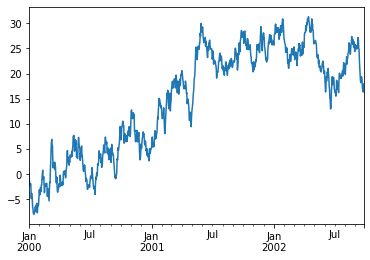

In [117]:
ts.plot()

On DataFrame, plot() is convenient for plotting all the columns with respect to the index values:

In [118]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
2000-01-01,0.554694,0.295164,-0.085887,0.008634
2000-01-02,-0.161967,0.516760,0.546291,-1.139715
2000-01-03,0.741730,1.091775,0.410536,0.201449
2000-01-04,0.392718,-0.861043,-0.807207,0.268120
2000-01-05,-0.303133,-0.483313,-0.484739,-0.522341
...,...,...,...,...
2002-09-22,-1.570419,-0.488047,-0.481256,2.096927
2002-09-23,-0.132153,-0.571208,-3.396691,1.198362
2002-09-24,-0.878341,0.314753,-1.169862,0.276259
2002-09-25,-0.254237,-0.251130,-2.064734,0.067535


In [119]:
df = df.cumsum()
df

,A,B,C,D
2000-01-01,0.554694,0.295164,-0.085887,0.008634
2000-01-02,0.392727,0.811924,0.460403,-1.131081
2000-01-03,1.134457,1.903699,0.870940,-0.929632
2000-01-04,1.527175,1.042656,0.063732,-0.661512
2000-01-05,1.224042,0.559343,-0.421006,-1.183854
...,...,...,...,...
2002-09-22,-0.311744,21.932897,-4.481000,-17.476831
2002-09-23,-0.443898,21.361689,-7.877692,-16.278469
2002-09-24,-1.322239,21.676442,-9.047554,-16.002209
2002-09-25,-1.576476,21.425312,-11.112288,-15.934675


<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

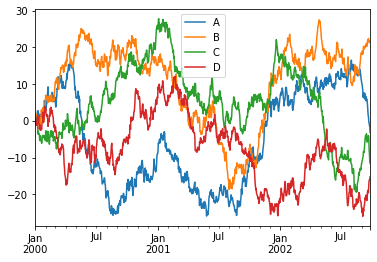

In [120]:
plt.figure()
df.plot()
plt.legend(loc='best')

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

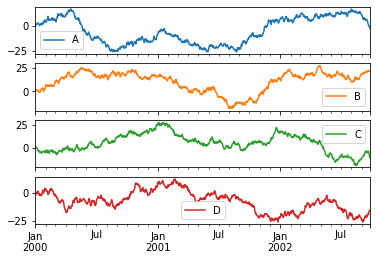

In [121]:
df.plot(subplots=True)

<AxesSubplot:>

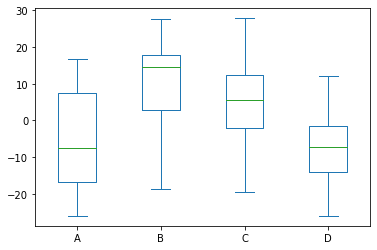

In [122]:
df.plot(kind='box')

<AxesSubplot:xlabel='A'>

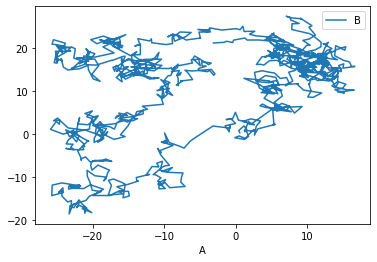

In [123]:
df.plot(x='A', y='B')

## Getting Data In/Out (file formats)

Read more: [IO tools (text, CSV, HDF5, …)](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)

<br>

Note: Pickle and Json are popular file formats which we don't cover in this tutorial. 

<br>They each have their advantages and disadvantages in comparison to CSV. 
<br>E.g.,<br>
&emsp;&emsp;- CSV is suitable for small data sets otherwise it will lose data. E.g., The badly thought-out use of Microsoft's Excel software was the reason nearly 16,000 <br>&emsp;&emsp; coronavirus cases went unreported in 
England. [Read more](https://www.bbc.com/news/technology-54423988)<br>
<br>
<br>
&emsp;&emsp;- Pickle is much faster when compared to CSV files and reduces the file size substantialy using its compression techniques. Pickle lets the user to store data in binary format. JSON lets the user store data in a human-readable text format. Not only the data fields but with the pickle module, even classes and methods can be serialized and de-serialized. But it is not human readable &emsp;&emsp;and can be used only with Python. 
<br>
<br>
<br>
&emsp;&emsp;- Unlike CSV JSON is suitable for storing large and hierarchical data (data stored in key-value relationships). But is slower than CSV. Unlike Pickle JSON is limited to certain python objects (only the follwoing data types: a string, number,  an array and a boolean, null, JSON object - to dump a Python object to JSON string, you can use the json. dumps() method), and it cannot serialize every python object but it is human readible.  [Read more](https://blog.datafiniti.co/4-reasons-you-should-use-json-instead-of-csv-2cac362f1943)

JSON data is written in key/value pairs. The key and value are separated by a colon(:) in the middle with the key on the left and the value on the right. Different key/value pairs are separated by a comma(,). The key is a string surrounded by double quotation marks for example “name”. The values can be of the following types:

- Number

- String: Sequence of Unicode characters surrounded by double quotation marks.

- Boolean: True or False.

- Array: A list of values surrounded by square brackets, for example


### Excel

XLS file format is an Excel Sheets binary file format which holds information about all the worksheets in a file, including both content and formatting.

Writing to an excel file:

In [124]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file:

In [125]:
pd.read_excel('foo.xlsx', 'Sheet1', na_values=['NA']) # na_values - Additional strings to recognize as NA/NaN.

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.554694,0.295164,-0.085887,0.008634
1,2000-01-02,0.392727,0.811924,0.460403,-1.131081
2,2000-01-03,1.134457,1.903699,0.870940,-0.929632
3,2000-01-04,1.527175,1.042656,0.063732,-0.661512
4,2000-01-05,1.224042,0.559343,-0.421006,-1.183854
...,...,...,...,...,...
995,2002-09-22,-0.311744,21.932897,-4.481000,-17.476831
996,2002-09-23,-0.443898,21.361689,-7.877692,-16.278469
997,2002-09-24,-1.322239,21.676442,-9.047554,-16.002209
998,2002-09-25,-1.576476,21.425312,-11.112288,-15.934675


### CSV
Comma-separated values file stores the data (values) in a list format separated by commas. It is human readable. 

Writing to a csv file:

In [126]:
df.to_csv('foo.csv')

Reading from a csv file

In [127]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.554694,0.295164,-0.085887,0.008634
1,2000-01-02,0.392727,0.811924,0.460403,-1.131081
2,2000-01-03,1.134457,1.903699,0.870940,-0.929632
3,2000-01-04,1.527175,1.042656,0.063732,-0.661512
4,2000-01-05,1.224042,0.559343,-0.421006,-1.183854
...,...,...,...,...,...
995,2002-09-22,-0.311744,21.932897,-4.481000,-17.476831
996,2002-09-23,-0.443898,21.361689,-7.877692,-16.278469
997,2002-09-24,-1.322239,21.676442,-9.047554,-16.002209
998,2002-09-25,-1.576476,21.425312,-11.112288,-15.934675


### HDF5


There are two types of HDF files. The specification currently maintained by the HDF Group is HDF5. The older version is HDF4 and it is no longer maintained. The two types are completely different formats.


Writing objects to HDF5 Store (file format)

- Hierarchical Data Format (HDF) is a set of file formats designed to store and organize large amounts of data.
<br>

- One HDF file can hold a mix of related objects (Series/Data Frames) which can be accessed as a group or as individual objects.
<br>

- It is particularly handy when you need to organize your data models in a hierarchical fashion (similar to folders) and you also need a fast way to retrieve the data.

Read more: [great blog post](https://www.numpyninja.com/post/hdf5-file-format-with-pandas)

Write the contained data to an HDF5 file using HDFStore:

pd.to_hdf(path_to_hdf, key, value) 

- path_or_bufstr: pandas.HDFStore
  File path or HDFStore object
- key: type str for Identifier for the group in the store
- value: Series or DataFrame values to store (other types of data e.g. np.array or list or dictionary need to be     converted to either series or dataframe)


In [128]:
path_to_hdf='foo.h5'
key='df' # Identifier for the group in the store
df.to_hdf(path_to_hdf, key)

Reading from a HDF5 store:

In [129]:
pd.read_hdf(path_to_hdf, key) 

,A,B,C,D
2000-01-01,0.554694,0.295164,-0.085887,0.008634
2000-01-02,0.392727,0.811924,0.460403,-1.131081
2000-01-03,1.134457,1.903699,0.870940,-0.929632
2000-01-04,1.527175,1.042656,0.063732,-0.661512
2000-01-05,1.224042,0.559343,-0.421006,-1.183854
...,...,...,...,...
2002-09-22,-0.311744,21.932897,-4.481000,-17.476831
2002-09-23,-0.443898,21.361689,-7.877692,-16.278469
2002-09-24,-1.322239,21.676442,-9.047554,-16.002209
2002-09-25,-1.576476,21.425312,-11.112288,-15.934675


In order to add another DataFrame or Series to an existing HDF file please use append mode and a different key.

In [130]:
key2 = "group1/df2"
left.to_hdf(path_to_hdf, key2, mode='a') # Mode to open file: ‘w’: write, a new file is created 
                                        # (an existing file with the same name would be deleted).
                                        # ‘a’: append, an existing file is opened for reading and writing, and if the file does not exist it is created.

In [131]:
key1 = "group1/df3"
right.to_hdf(path_to_hdf, key1, mode='a') # Mode to open file: ‘w’: write, a new file is created 
                                        # (an existing file with the same name would be deleted).
                                        # ‘a’: append, an existing file is opened for reading and writing, and if the file does not exist it is created.

In [132]:
pd.read_hdf(path_to_hdf, key2)

,key,lval
0,foo,1
1,bar,2
2,baz,3


## ValueError: The truth value of a Series is ambiguous.
If you are trying an operation and you see an exception like:

In [133]:
# The built-in all() and any() functions to check for the truth value  of items in an iterable
# all() checks if all the items in an input iterable are truth,
# while the any() checks if any item in the input iterable is truth

if pd.Series([False, True, False]):
#if (np.array([False, True, False]).any()): 
#if (np.array([False, True, False]).all()): 

    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

To read more on [Gotchas](https://pandas.pydata.org/pandas-docs/version/0.19.2/gotchas.html)